<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Karla Anton ,
             Anehi Karely Mayorquin.

**Fecha:** 06 de octubre del 2020.

**Expediente** : Karely = if707468 , Karla= if714572.
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 9

Link: https://github.com/anehik/ProyectoConjunto_AKMayorquin_KAnton

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

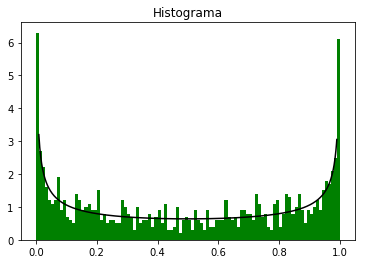

In [8]:
#Solución Karely
# Se nos da la función de prob acumulada, por tanto esa se utiliza para generar los aleatorios
# Para comprobar, se deriva para sacar f(x), y los puntos generados deben estar bajo esta curva
u = np.random.rand(1000)
fx = np.sin(np.pi/2 * u)**2

x = np.arange(0.01,0.99,0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
plt.plot(x,y, color = 'black')
plt.hist(fx, 100, density=True, color = 'green')
plt.title('Histograma')
plt.show()

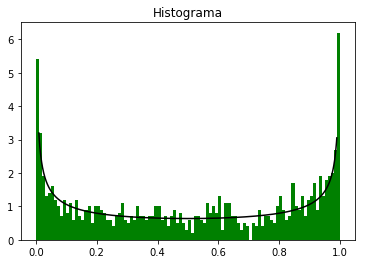

In [9]:
#Solución Karla
u = np.random.rand(1000)
fx = np.sin(np.pi/2 * u)**2
x = np.arange(0.01,0.99,0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
plt.plot(x,y, color = 'black')
plt.hist(fx, 100, density=True, color = 'green')
plt.title('Histograma')
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

In [10]:
#Solución Karely
# Función que calcula la probabilidad acumulada optimizada
def fun_bin_opt(n,p):
    global matriz
    matriz = np.zeros(n)
    matriz[0] = (1-p)**n
    def m(i):
        global matriz
        c  = p/(1-p)
        matriz[i+1]=(c*(n-i)/(i+1))*matriz[i]
        
    
    [m(i) for i in range(n-1)] #Se va llenando el vector "matriz"
    return np.cumsum(matriz)

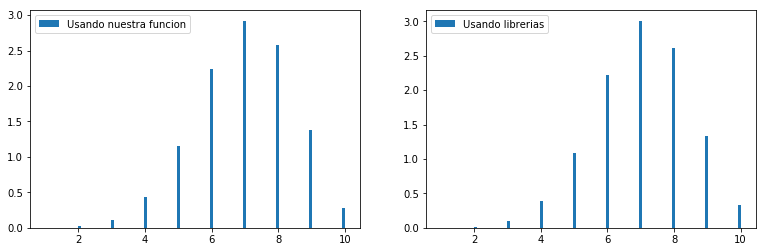

In [11]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

binomial = fun_bin_opt(n,p) #funcion optimizada
u = np.random.rand(N)

# Gráfica de resultados con nuestra funcion 
plt.figure(figsize=[13,4])
plt.subplot(121)
binomial_n = list(map(lambda j:sum(1 for i in binomial if i<u[j]),range(N)))
plt.hist(binomial_n,100,density=True,label='Usando nuestra funcion')
plt.legend()

# Con la libreria de numpy
plt.subplot(122)
bin_numpy = np.random.binomial(n,p,N)
plt.hist(bin_numpy,100,density=True,label='Usando librerias')
plt.legend()
np.histogram
plt.show()

In [12]:
#Solución Karla
def fun_bin_opt(n,p):
    global matriz
    matriz = np.zeros(n)
    matriz[0] = (1-p)**n
    def m(i):
        global matriz
        c  = p/(1-p)
        matriz[i+1]=(c*(n-i)/(i+1))*matriz[i]
        
    
    [m(i) for i in range(n-1)] #Se va llenando el vector "matriz"
    return np.cumsum(matriz)

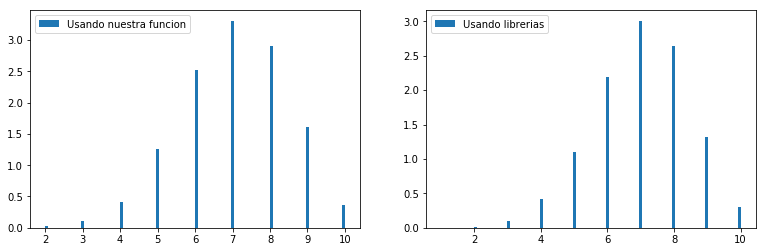

In [13]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

binomial = fun_bin_opt(n,p) #funcion optimizada
u = np.random.rand(N)

# Gráfica de resultados con nuestra funcion 
plt.figure(figsize=[13,4])
plt.subplot(121)
binomial_n = list(map(lambda j:sum(1 for i in binomial if i<u[j]),range(N)))
plt.hist(binomial_n,100,density=True,label='Usando nuestra funcion')
plt.legend()

# Con la libreria de numpy
plt.subplot(122)
bin_numpy = np.random.binomial(n,p,N)
plt.hist(bin_numpy,100,density=True,label='Usando librerias')
plt.legend()
np.histogram
plt.show()

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).